# Rotating edge experiment

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import itertools
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import octahedron

### Shattered stacked line

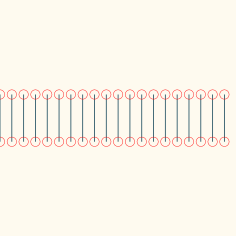

In [12]:
np.random.seed(42)
edges = np.array([[[x*5,40,0],[x*5,60,-100]] for x in range(0,20)])

e_prime = EdgeCollection(edges)
page = draw.quick_draw_edges(e_prime.edges, v=True)
Image(page.image(kind="rgba", ppi=60).png())

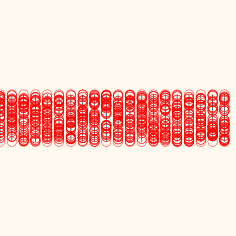

In [15]:

e_split = EdgeCollection(transform.rand_split_edge(e_prime.edges[0],n_splits=30))
for e in e_prime.edges[1:]:
    e_split = e_split.combine(EdgeCollection(transform.rand_split_edge(e ,n_splits=30)))

transform.point_push(e_split, force=100,  origin=np.array([[51,50, -60]]), lin_scale = 100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*[51,50, 0][:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

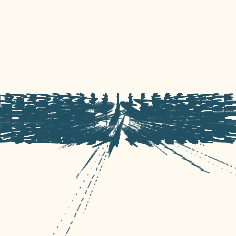

In [16]:

ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range (25):
    ec.step()
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

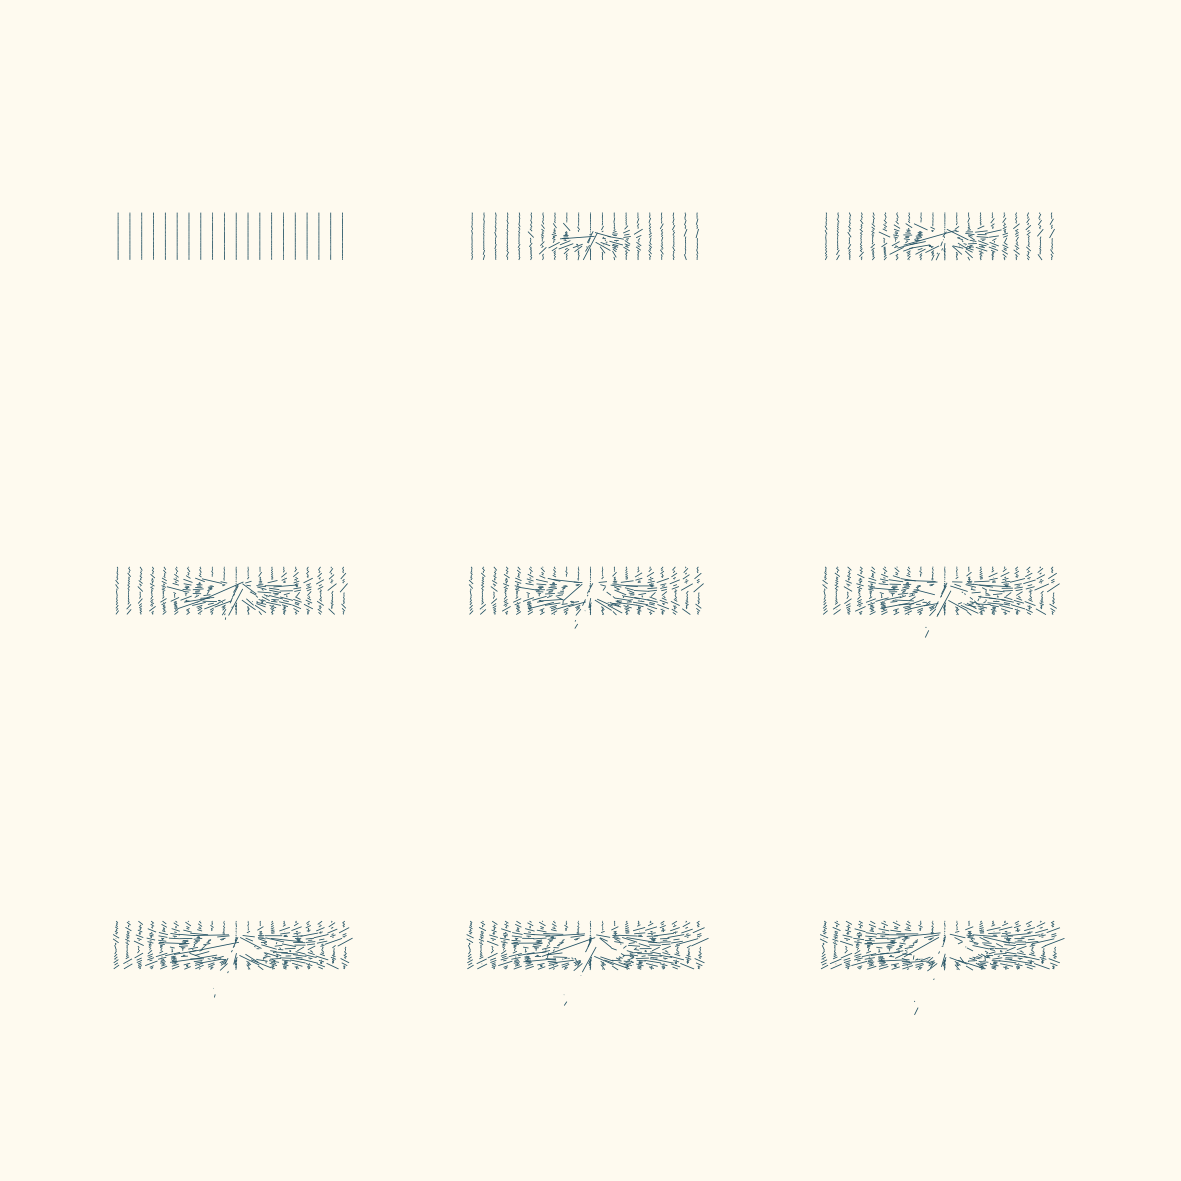

In [17]:
tiled_page, tile_origins = draw.setup_tiled_page(tile_size = (100, 100), n_tiles= (3,3), gap = (50,50))
ec = e_split.copy()
for i,j in itertools.product(range(3), range(3)):
        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            page=tiled_page,
            origins=tile_origins,
            v=False
        )
        ec.step()
draw.page_save_iteration(tiled_page, name="shattered_verticals", show=True)